In [1]:
import requests


In [4]:
file = "gz_2010_us_050_00_500k.json"
# The following just grabs the html.
aaa = requests.get("https://eric.clst.org/tech/usgeojson?")
print(aaa.status_code)

200


In [2]:
with open("gz_2010_us_050_00_500k.json") as fpr:
    ss = fpr.read()

In [3]:
print(len(ss))

23543838


In [4]:
import json
js = json.loads(ss)

In [5]:
print(js.keys())

dict_keys(['type', 'features'])


In [9]:
print(js['features'][100])

{'type': 'Feature', 'properties': {'GEO_ID': '0500000US04009', 'STATE': '04', 'COUNTY': '009', 'NAME': 'Graham', 'LSAD': 'County', 'CENSUSAREA': 4622.597}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-110.448586, 32.643271], [-110.448626, 32.702261], [-110.448457, 32.771158], [-110.448444, 32.947423], [-110.449377, 32.950149], [-110.449407, 32.987416], [-110.449408, 32.988177], [-110.44941, 32.990169], [-110.449162, 33.161651], [-110.449021, 33.194526], [-110.446964, 33.192133], [-110.446426, 33.189847], [-110.436928, 33.187683], [-110.43558, 33.18918], [-110.432634, 33.187714], [-110.430165, 33.189588], [-110.429739, 33.190978], [-110.42638, 33.192183], [-110.420614, 33.193575], [-110.419624, 33.191115], [-110.416858, 33.191574], [-110.415945, 33.192492], [-110.413769, 33.19173], [-110.408594, 33.192036], [-110.406428, 33.194477], [-110.404597, 33.19747], [-110.403781, 33.196258], [-110.401536, 33.196612], [-110.400511, 33.198376], [-110.405268, 33.20402], [-110.408201, 33.20420

In [24]:
MeckData = None
for x in js['features']:
    if x['properties']['NAME'] == 'Mecklenburg':
        MeckData = x['geometry']['coordinates']
        break

In [28]:
print(MeckData[0])

[[-80.840383, 35.001636], [-80.851343, 35.014411], [-80.851458, 35.014545], [-80.864372, 35.029597], [-80.870549, 35.036798], [-80.88142, 35.049469], [-80.884863, 35.053482], [-80.884887, 35.05351], [-80.898065, 35.067653], [-80.90644, 35.076641], [-80.906553, 35.076763], [-80.919956, 35.091228], [-80.93495, 35.107409], [-80.947111, 35.099572], [-80.95787, 35.092639], [-80.957874, 35.092637], [-80.98416, 35.077568], [-80.98915, 35.074707], [-81.013094, 35.060981], [-81.041489, 35.044703], [-81.050018, 35.055246], [-81.055695, 35.060121], [-81.057648, 35.062433], [-81.058029, 35.07319], [-81.057236, 35.086129], [-81.052078, 35.096276], [-81.050079, 35.098817], [-81.046524, 35.100617], [-81.040078, 35.101972], [-81.037369, 35.102541], [-81.034958, 35.104105], [-81.032806, 35.108049], [-81.032471, 35.110033], [-81.033005, 35.113747], [-81.036759, 35.122552], [-81.038968, 35.126299], [-81.05042, 35.131048], [-81.051037, 35.131654], [-81.051204, 35.133237], [-81.047826, 35.143743], [-81.047

In [73]:
# Gather lat/long co-ordinate data for the boundary of Mecklenburg County, NC 
# together. 

# Longitude position in degrees East. 
x = [coords[0] for coords in MeckData[0]]
# Latitude position in degrees North.
y = [coords[1] for coords in MeckData[0]]

# Populate lists with the lat/long co-ordinates for selected 
# constituent towns and cities.

locx = [-80.72, -80.84, -80.84, -80.89]
locy = [35.12, 35.23, 35.41, 35.08]
loctext = ["Matthews", "Charlotte", "Huntersville", "Pineville"]

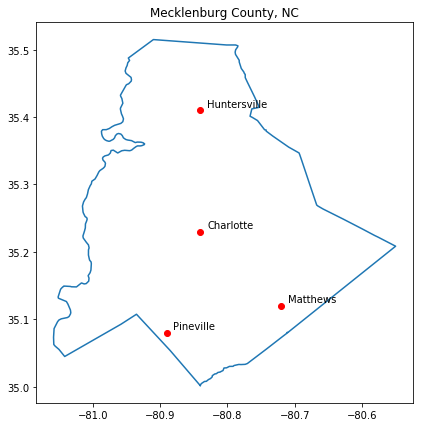

In [78]:
# Create a plot of the boundary of Mecklenburg County, NC together
# with selected constituent towns and cities.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)

# Get the current Axes instance on the current figure.
# For this axis set, specify that the same scaling should be used 
# to plot units for x and y.

# The 'box' parameter specifies that the physical dimensions 
# of the Axes should be changed in order to meet the scaling requirement.

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

fig = plt.gcf()
fig.set_size_inches(7.0, 7.0)

ax.scatter(locx, locy, color='red')

for idx, town in enumerate(loctext):
    ax.annotate(town, (locx[idx]+0.01, locy[idx]+0.005))
    
plt.title("Mecklenburg County, NC")
plt.show()

In [1]:
import geopandas as gp

In [6]:
import matplotlib.pyplot as plt

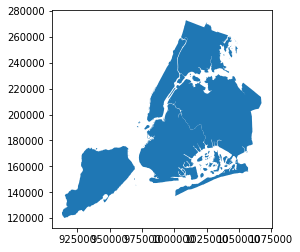

In [9]:
nybb_path = gp.datasets.get_path('nybb')
boros = gp.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)

boros.plot()

In [ ]:
nybb_path = gp.datasets.get_path('nybb')
boros = gp.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)

boros.plot()

In [22]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


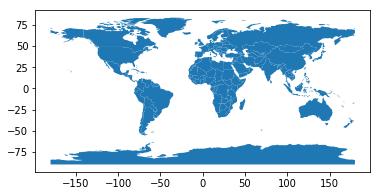

In [23]:
world.plot()

In [1]:
import geoplot as gplt
gplt.datasets.get_path('nyc_map_pluto_sample')

'https://raw.githubusercontent.com/ResidentMario/geoplot-data/master/nyc-map-pluto-sample.geojson'

In [5]:
import geopandas as gp
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [13]:
dir(gp.tools)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'collect',
 'geocode',
 'geocoding',
 'overlay',
 'reverse_geocode',
 'sjoin',
 'util']

In [15]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_10m_rivers_europe.geojson"
euroflow = gp.read_file(url)

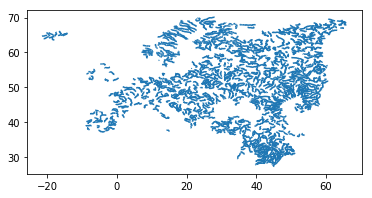

In [16]:
euroflow.plot()

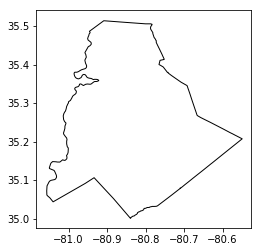

In [24]:
uscounties = gp.read_file("./mecklenburg_nc.json")
uscounties.plot(color='white', edgecolor='black')

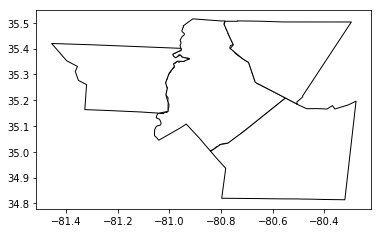

In [25]:
charlotte_counties = gp.read_file("./charlotte_nc_metro.json")
charlotte_counties.plot(color='white', edgecolor='black')

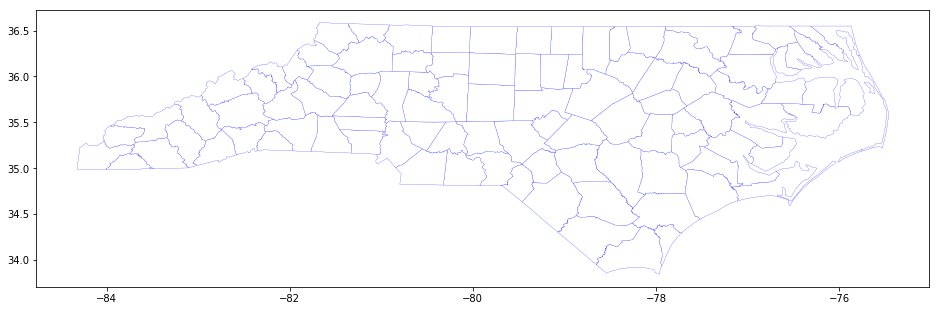

In [39]:
nc = gp.read_file("./nc.json")
nc.plot(color='white', edgecolor='blue', figsize=(16, 8), linewidth=0.2)

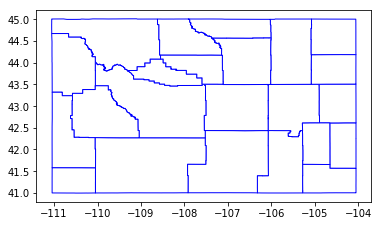

In [28]:
us = gp.read_file("./state56.json")
us.plot(color='white', edgecolor='blue')

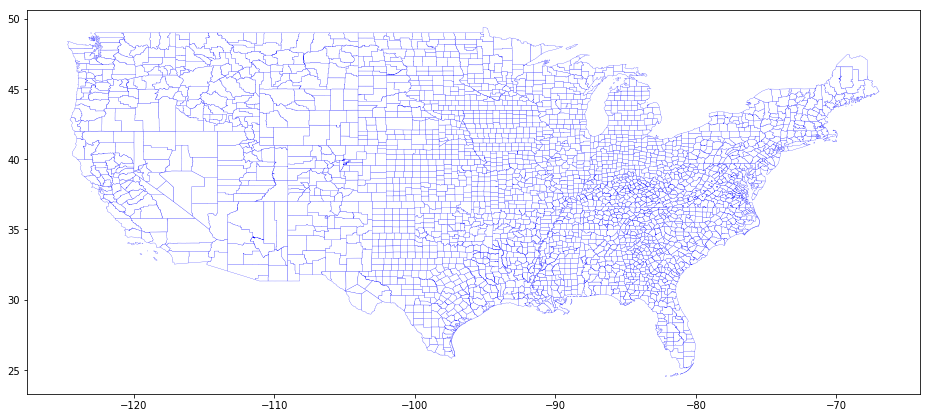

In [37]:
us = gp.read_file("./test.json")
us.plot(color='white', edgecolor='blue', figsize=(16, 8), linewidth=0.2)

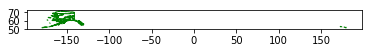

In [33]:
ak = gp.read_file("./alaska.json")
ak.plot(color='white', edgecolor='green')

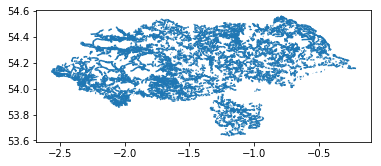

In [19]:
# Public foot-paths in North Yorkshire.
url = "https://www.rowmaps.com/jsons/NY/mutated1.json"
yorkshire = gp.read_file(url)
yorkshire.plot()

In [ ]:
#import requests
#keystr = "key=ea8c5c326f05620d280d06ef3efb4beaa72f044c"
#url = "https://api.census.gov/data/2015/acs/acs5?get=NAME,B00001_001E&for=tract:*&in=state:01&"
#url += keystr
#ri = requests.get(url)
#print(ri.status_code)
        

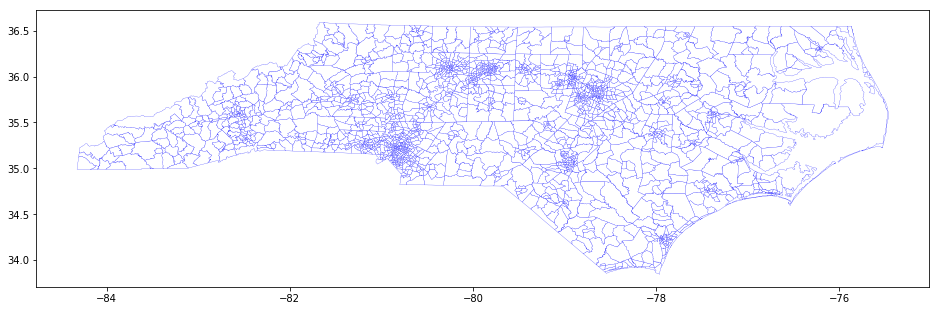

In [2]:
# mapshaper.org did the conversion from (.dbf, .prj, .shp, .shx) to GeoJSON

# The above data came from here ....
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

%matplotlib inline
import geopandas as gp
url = "cb_2018_37_tract_500k.json"
nc_census_tracts = gp.read_file(url)
nc_census_tracts.plot(color='white', edgecolor='blue', figsize=(16, 8), linewidth=0.2)


In [10]:
print(nc_census_tracts.loc[nc_census_tracts['COUNTYFP']=='059'])
#print(nc_census_tracts[['AFFGEOID', 'NAME']])

     STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID NAME LSAD  \
701       37      059  080500  1400000US37059080500  37059080500  805   CT   
737       37      059  080700  1400000US37059080700  37059080700  807   CT   
1027      37      059  080400  1400000US37059080400  37059080400  804   CT   
1078      37      059  080100  1400000US37059080100  37059080100  801   CT   
1499      37      059  080600  1400000US37059080600  37059080600  806   CT   
1794      37      059  080200  1400000US37059080200  37059080200  802   CT   
1898      37      059  080300  1400000US37059080300  37059080300  803   CT   

          ALAND   AWATER                                           geometry  
701    32878268   187389  POLYGON ((-80.53625099999999 35.94685, -80.534...  
737    87838189  1355664  POLYGON ((-80.57333299999999 35.860938, -80.56...  
1027  116061326  1680970  POLYGON ((-80.498554 35.915641, -80.4928649999...  
1078  226183429  1620393  POLYGON ((-80.707826 35.852929, -80.7

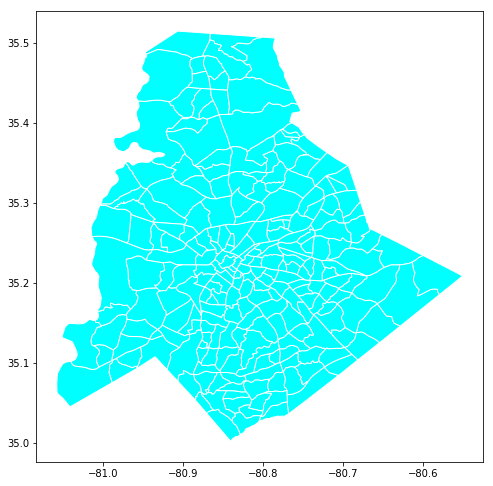

In [114]:
nc_census_tracts.loc[nc_census_tracts['COUNTYFP']=='119'].plot(color='cyan', edgecolor='white', figsize=(8, 10))

In [120]:
import copy

MeckCT = nc_census_tracts.loc[nc_census_tracts['COUNTYFP']=='119']
print(MeckCT.head())
xxx = MeckCT.loc[MeckCT['NAME']=='17.02', ['geometry']]


clist = list(xxx.exterior.values[0].coords)

clist.append(clist[0])
#for aaa in clist:
#    print(aaa)

   STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME LSAD  \
68      37      119  005843  1400000US37119005843  37119005843  58.43   CT   
69      37      119  005915  1400000US37119005915  37119005915  59.15   CT   
70      37      119  006203  1400000US37119006203  37119006203  62.03   CT   
82      37      119  001505  1400000US37119001505  37119001505  15.05   CT   
83      37      119  001702  1400000US37119001702  37119001702  17.02   CT   

      ALAND    AWATER                                           geometry  
68  2948419     11453  POLYGON ((-80.815907 35.047273, -80.8158359999...  
69  1101210         0  POLYGON ((-80.931831 35.141493, -80.927527 35....  
70  5341820  10795026  POLYGON ((-80.947344 35.488473, -80.917007 35....  
82  5239455     16974  POLYGON ((-80.76841899999999 35.267423, -80.76...  
83  3687346      8818  POLYGON ((-80.785394 35.203868, -80.783475 35....  


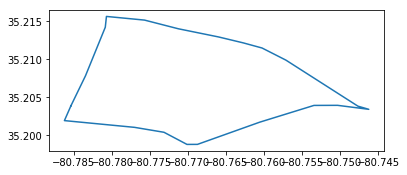

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([coords[0] for coords in clist], [coords[1] for coords in clist])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# 2010 census tract information .... https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2010.html
# ACS American Community Survey 5-year data (2009-2017)